In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("california_housing_train.csv")
data_df = df.copy()

In [5]:
print("(No of rows, No of Columns) = ",data_df.shape)
data_df.head()

(No of rows, No of Columns) =  (17000, 9)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [20]:
arr = np.array(df.drop('median_house_value', axis=1)).T
mean_std_arr = np.vstack([np.mean(arr, axis=1), np.std(arr, axis=1)]).T

for i in range(len(arr)):
    arr[i] = (arr[i]-mean_std_arr[i,0])/mean_std_arr[i,1]

y_train = np.array(df['median_house_value'])  # extract the price column from data
x_train = arr.T

print(x_train.shape,y_train.shape)

(17000, 8) (17000,)


In [21]:
def loss(y_pred,y_true):
    squared_diff=(y_pred-y_true)**2
    mse=squared_diff.mean()
    return mse

In [22]:
def y_prediction(x,a,b):
    m,n=x.shape
    y_pred=x.dot(a)+b
    assert(y_pred.shape == (m,))
    return y_pred

In [23]:
def gradient(x,a,b,y_true):
    m,n=x.shape
    yp=y_prediction(x,a,b)

    da = (2 / m) * np.dot(x.T,yp-y_true)
    db = (2 / m) * np.sum(yp-y_true) 
    assert(da.shape ==(n,))
    return (da,db)

In [28]:
def gradient_descent(x,y_true,learning_rate=0.01,epochs = 10):
    m,n = x.shape
    loss_mse = []                                 # initialize empty list to store loss
    a = np.random.normal(0, 0.5, size = (n,)) * np.sqrt(2/n)     # initialize a- weights and b- bias
    b = 0

    for i in range(epochs):
        da,db=gradient(x,a,b,y_true)
        a = a - learning_rate * da  # Update weights a
        b = b - learning_rate * db  # Update bias b
        y_pred=y_prediction(x,a,b)
        l_mse=loss(y_pred,y_true)
        loss_mse.append(l_mse)
        print("Epoch ",i+1," Completed!","loss = ",l_mse/10**10) 
    
    print("Training completed!!")

    assert(a.shape==(n,))

    return (loss_mse,a,b)

In [29]:
epochs = 200            # tweak this!!!
learn_rate = 0.02          # choose learning rate wisely otherwise loss may diverge!!

train_loss,a,b = gradient_descent(x_train, y_train, learn_rate, epochs)

Epoch  1  Completed! loss =  5.2490476848049
Epoch  2  Completed! loss =  4.886627315511174
Epoch  3  Completed! loss =  4.552732683589945
Epoch  4  Completed! loss =  4.245065176068082
Epoch  5  Completed! loss =  3.961523966020552
Epoch  6  Completed! loss =  3.7001855893332536
Epoch  7  Completed! loss =  3.459286517016625
Epoch  8  Completed! loss =  3.237208089289287
Epoch  9  Completed! loss =  3.0324633419715297
Epoch  10  Completed! loss =  2.8436853741600787
Epoch  11  Completed! loss =  2.66961699180834
Epoch  12  Completed! loss =  2.509101424049953
Epoch  13  Completed! loss =  2.3610739545334765
Epoch  14  Completed! loss =  2.224554343427394
Epoch  15  Completed! loss =  2.0986399404918266
Epoch  16  Completed! loss =  1.9824994081121818
Epoch  17  Completed! loss =  1.8753669871762515
Epoch  18  Completed! loss =  1.7765372493841851
Epoch  19  Completed! loss =  1.6853602878942744
Epoch  20  Completed! loss =  1.6012373047606099
Epoch  21  Completed! loss =  1.5236165588

Loss on test data =  0.5253785518991728


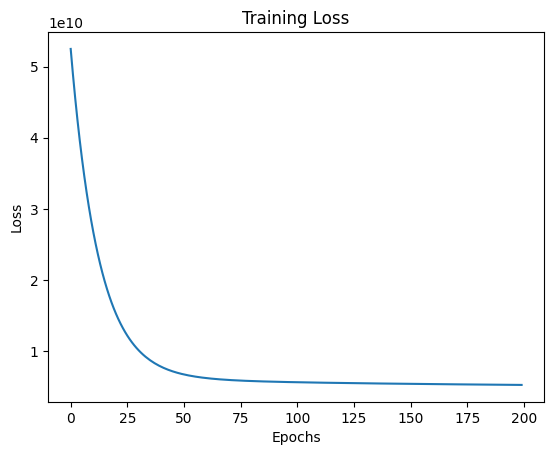

In [30]:
test_df = pd.read_csv("california_housing_test.csv")

arr_test = np.array(test_df.drop('median_house_value', axis=1)).T

for i in range(len(arr_test)):
    arr_test[i] = (arr_test[i]-mean_std_arr[i,0])/mean_std_arr[i,1]

y_test = np.array(test_df['median_house_value'])                 # extract the price column from data

x_test = arr_test.T
y_pred=y_prediction(x_test,a,b)
squared_diff=(y_pred-y_test)**2
test_loss=squared_diff.mean()/10**10

print("Loss on test data = ",test_loss)

# Visualization of loss

plt.plot([i for i in range(epochs)], train_loss)                   # plot loss versus epochs
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()